<a href="https://colab.research.google.com/github/rivalsolmons/BTP/blob/main/Cost_dataset_1_zia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effort and cost Estimation in Agile Software Development

In [125]:
#@title Cost Estimation on Zia 
import math
import pandas as pd
import numpy as np

from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report



In [126]:
from google.colab import drive
drive.mount('/content/drive')

data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/Zia_upd2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [128]:
#@title Improving The data Qualitity 
#@markdown  

In [129]:
#@title Defining Category 1 and Category 2


features = ['Effort'	,'Vi',	'D',	'V',		'Work_days',	'Team_Salary',	'Act_Time']
#features = ['Actual_Cost',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Act_Time'] 



Cat_1 = data_read[features]
Cat_2 = data_read['Actual_Cost']

In [130]:

#@title Describing Categorical Data 
Cat_1.describe()


,Effort,Vi,D,V,Work_days,Team_Salary,Act_Time
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,163.714286,4.071429,0.780381,3.023810,21.952381,246190.476190,56.428571
std,82.743062,0.325796,0.071028,0.438069,0.218218,46419.413016,26.177417
min,62.000000,3.700000,0.646000,2.400000,21.000000,190000.000000,21.000000
25%,101.000000,3.900000,0.742000,2.800000,22.000000,220000.000000,35.000000
50%,137.000000,4.000000,0.758000,2.900000,22.000000,250000.000000,52.000000
75%,211.000000,4.200000,0.833000,3.200000,22.000000,250000.000000,80.000000
max,339.000000,4.900000,0.903000,4.200000,22.000000,400000.000000,112.000000


In [131]:
#For debugging purpose
#print(Cat_1)

In [132]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,Effort,Vi,D,V,Work_days,Team_Salary,Act_Time
0,156,4.2,0.687,2.7,22,230000,63
1,202,3.7,0.701,2.5,21,260000,92
2,173,4.0,0.878,3.3,22,250000,56
3,331,4.5,0.886,3.8,22,300000,86
4,124,4.9,0.903,4.2,22,300000,32
5,339,4.1,0.903,3.6,22,400000,91
6,97,4.2,0.859,3.4,22,250000,35
7,257,3.8,0.833,3.0,22,250000,93
8,84,3.9,0.646,2.4,22,190000,36
9,211,4.6,0.758,3.2,22,250000,62


In [133]:
print('The overall nummber of projects are: ',len(Cat_2))

The overall nummber of projects are:  21


In [134]:
display(Cat_2)

0     1200000
1     1600000
2     1000000
3     2100000
4      750000
5     3200000
6      600000
7     1800000
8      500000
9     1200000
10     800000
11     650000
12     600000
13     400000
14     350000
15    2000000
16     800000
17    1000000
18    1500000
19     800000
20     550000
Name: Actual_Cost, dtype: int64

In [135]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [136]:
import math
print(y_test)


8      500000
13     400000
20     550000
1     1600000
11     650000
Name: Actual_Cost, dtype: int64


In [137]:
print(y_pred1)

[ 519105.92988206  324019.47957263  678543.59988628 1752066.93586203
  547413.02801067]


In [138]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

Text(0.5, 1.0, 'Cost Actual vs Predicted Linear Regresssion')

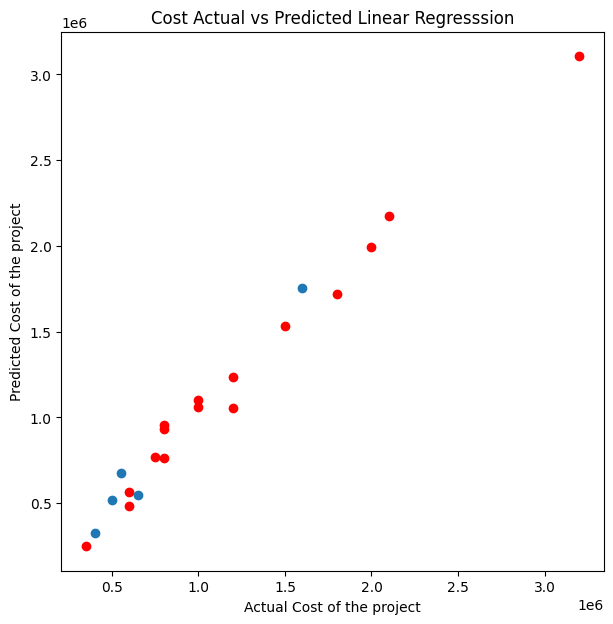

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Cost of the project')
plt.ylabel('Predicted Cost of the project')
plt.title('Cost Actual vs Predicted Linear Regresssion')




In [140]:
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [141]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1%10**5,'Difference':y_test-y_pred1})



pred_y_diff[0:21]


,Actual Values of Cost,Predicted Cost,Difference
8,500000,19105.929882,-19105.929882
13,400000,24019.479573,75980.520427
20,550000,78543.599886,-128543.599886
1,1600000,52066.935862,-152066.935862
11,650000,47413.028011,102586.971989


In [142]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [143]:

print(arr)

    Actual  Cost
8         500000
13        400000
20        550000
1        1600000
11        650000


In [144]:
print(y_pred1)


[ 519105.92988206  324019.47957263  678543.59988628 1752066.93586203
  547413.02801067]


In [145]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=np.absolute(diff)/y_test
MMRE=np.mean(MRE)


Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
MRE=(diff/y_test)/MRE.size

MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
P2=MRE[MRE<MMRE]

Pred=(P.size/MRE.size) * 100
Pred2=(P2.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)


#linear

The r Score on the predictrd trained Set: 0.94
MMRE 0.028589869706239522
MdMRE 0.03156522215056319
PRED 25% 100.0
PRED MMRE 40.0
Model Accuracy 85.70506514688024


In [146]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=2, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

print(len(y_pred))
print("Mean Absolute error:::",mean_absolute_error(y_test,y_pred))
#print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred)))


# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))



#knn

5
Mean Absolute error::: 195000.0
The r Score on the predictrd trained Set: 0.68


<function matplotlib.pyplot.show(close=None, block=None)>

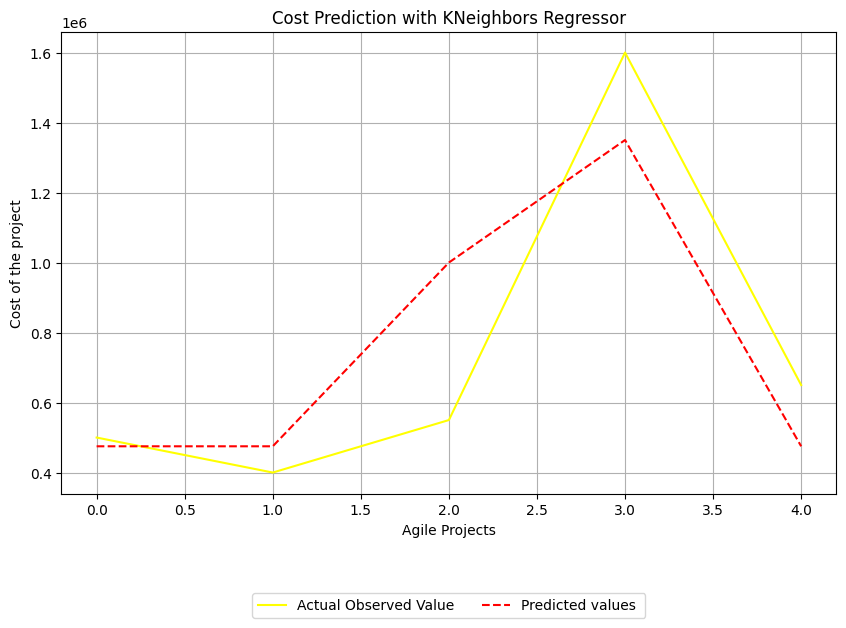

In [147]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost of the project')
plt.title('Cost Prediction with KNeighbors Regressor')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [148]:
#
diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MRE=(diff/y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

MMRE 0.05924650349650349
MdMRE 0.0375
PRED 25% 100.0


In [149]:
import pandas as pd

pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'Difference':y_test-y_pred})
xyy=pred_y_diff.Difference.abs()
pred_y_diff[0:21]

,Actual Values of Cost,Predicted Cost,Difference
8,500000,475000.0,25000.0
13,400000,475000.0,-75000.0
20,550000,1000000.0,-450000.0
1,1600000,1350000.0,250000.0
11,650000,475000.0,175000.0


In [150]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
8,500000,475000.0,0.050000
13,400000,475000.0,-0.187500
20,550000,1000000.0,-0.818182
1,1600000,1350000.0,0.156250
11,650000,475000.0,0.269231


----------------------------

Decision Tree Implementation

## Decision Tree Implementation 

In [151]:
data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [152]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['Effort'],axis=1)
X.shape

(21, 8)

In [153]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [155]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

Training R_sq is : 1.00


In [156]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [157]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)
y_test_pred_dt = regressor1.predict(X_test)



In [158]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

The r_sq  is: 1.00


In [159]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [160]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=(diff/y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
P2=MRE[MRE<MMRE]

Pred2=(P2.size/MRE.size) * 100
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)


The r Score on the predictrd trained Set: 0.92
MMRE 0.030867132867132867
MdMRE 0.025
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 85.70506514688024


<function matplotlib.pyplot.show(close=None, block=None)>

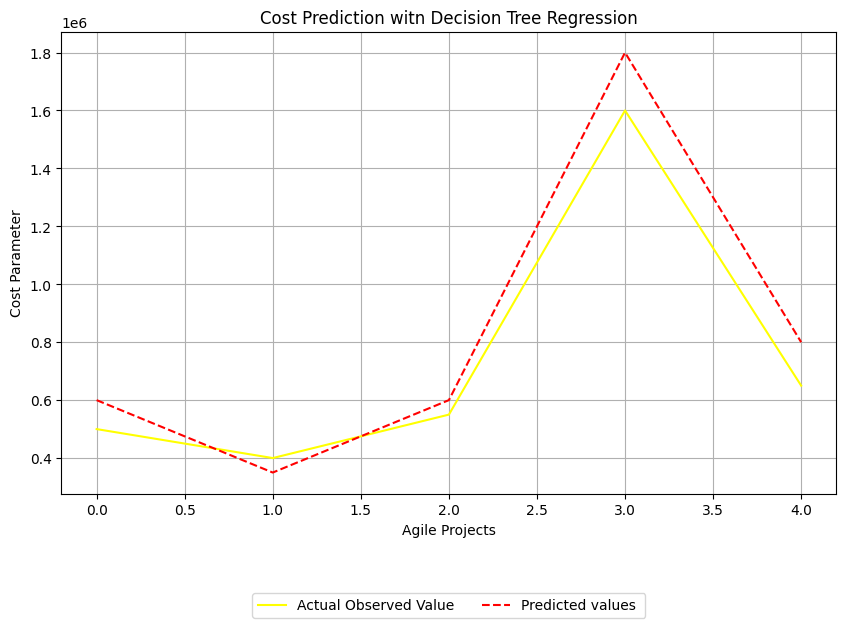

In [161]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost Parameter')
plt.title('Cost Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [162]:
# from yellowbrick.model_selection import ValidationCurve
# # Creating the validation curve
# import numpy as np
# visualizer = ValidationCurve(DecisionTreeRegressor(), 
#                              param_name="max_depth", n_jobs=-1,
#                              param_range=np.arange(1, 22), 
#                              cv=10, scoring="accuracy")

# visualizer.fit(X_train, y_train)

# # Saving plot in PNG format
# visualizer.show(outpath="Validation_Curve.png")

In [163]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Effort,Predicted Effort,MRE
8,500000,600000.0,-0.200000
13,400000,350000.0,0.125000
20,550000,600000.0,-0.090909
1,1600000,1800000.0,-0.125000
11,650000,800000.0,-0.230769


In [164]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
8,500000,600000.0,-100000.0
13,400000,350000.0,50000.0
20,550000,600000.0,-50000.0
1,1600000,1800000.0,-200000.0
11,650000,800000.0,-150000.0


In [165]:
#@title Random Forest Regresssor Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [166]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [167]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [168]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [169]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.98
r2 Score  0.9447201904098456


In [170]:
# print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
# print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
# xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
# print("Root Mean Squared Error::",xv)

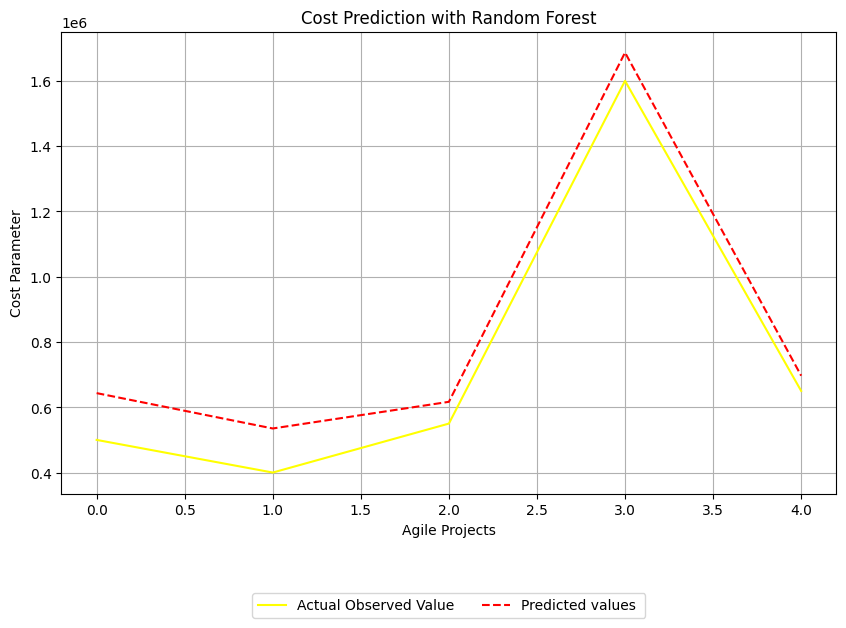

In [171]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost Parameter')
plt.title('Cost Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [172]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
8,500000,6.433333e+05,-0.286667
13,400000,5.350000e+05,-0.337500
20,550000,6.166667e+05,-0.121212
1,1600000,1.686667e+06,-0.054167
11,650000,6.966667e+05,-0.071795


Evaluation Parameters

In [173]:

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))

diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test


MRE=(diff/y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)
#

The r Score on the predictrd trained Set: 0.94
MMRE 0.03485361305361305
MdMRE 0.02424242424242423
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 96.51463869463869


In [174]:
#@title ADA BOOST
from sklearn.ensemble import AdaBoostRegressor


# Categorical To continious 
X_train_ada,X_test_ada,y_train_ada,y_test_ada = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


ada = AdaBoostRegressor()
ada.fit(X_train_ada,y_train_ada)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)
y_train_pred_ada=ada.predict(X_train_ada)
y_pred_ada=ada.predict(X_test_ada)



# The r_sq
print('The r Score on the predictrd test Set: %.2f'% r2_score(y_test_ada,y_pred_ada))
#print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_train_ada,y_train_pred_ada))

diff=np.absolute(y_test_ada-y_pred_ada)
# MRE=diff/y_test
MRE=(diff/y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)
#


The r Score on the predictrd test Set: 0.93
MMRE 0.03821228771228772
MdMRE 0.03636363636363636
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 96.17877122877124


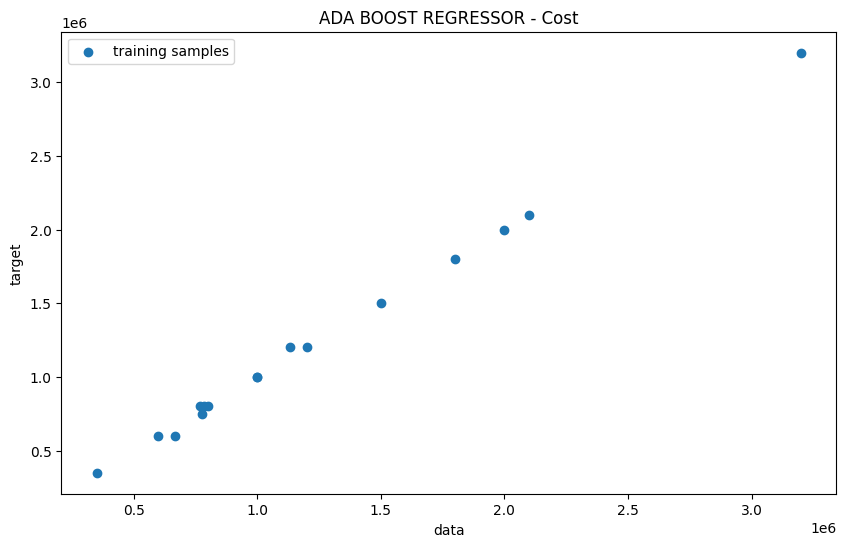

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")
# X_train_ada,X_test_ada,y_train_ada,y_test_ada
plt.figure()
plt.scatter(y_train_pred_ada,y_train_ada , label="training samples")
#plt.plot(X_test_ada,y_test_ada, color=colors[1], label="n_estimators=1", linewidth=2)
# plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("ADA BOOST REGRESSOR - Cost")
plt.legend()
plt.show()

In [176]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [177]:
#@title Ensemble Learning 

data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [178]:
from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# data_read['Actual_Cost'] = encoder.fit_transform(data_read['Actual_Cost'])

In [179]:
dff = data_read.sample(21)
dff_train = dff.iloc[:14,:].sample(10)
dff_val = dff.iloc[14:18,:].sample(4)
dff_test = dff.iloc[17:,:].sample(3)

In [180]:
dff_train

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
18,213,4.0,0.742,2.8,10,22,250000,80,1500000
7,257,3.8,0.833,3.0,10,22,250000,93,1800000
13,74,3.9,0.773,2.9,10,22,200000,30,400000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
14,62,3.9,0.773,2.9,10,22,200000,21,350000
16,113,4.0,0.742,2.8,10,22,250000,39,800000
17,141,4.0,0.742,2.8,10,22,250000,52,1000000
6,97,4.2,0.859,3.4,10,22,250000,35,600000
20,91,3.7,0.758,2.7,10,22,220000,35,550000


In [181]:
X_test = dff_val.iloc[:,0:8].values
y_test = dff_val.iloc[:-1].values

# len(X_test)
# len(y_test)


In [182]:
#@title Bagging with 3 Decision Trees 
df_bag = dff_train.sample(7,replace=True) 

X= df_bag.iloc[:,0:8]

Y= df_bag.iloc[:,-1]

df_bag

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
6,97,4.2,0.859,3.4,10,22,250000,35,600000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
6,97,4.2,0.859,3.4,10,22,250000,35,600000
6,97,4.2,0.859,3.4,10,22,250000,35,600000
13,74,3.9,0.773,2.9,10,22,200000,30,400000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000


In [183]:
X

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time
2,173,4.0,0.878,3.3,10,22,250000,56
6,97,4.2,0.859,3.4,10,22,250000,35
1,202,3.7,0.701,2.5,10,21,260000,92
6,97,4.2,0.859,3.4,10,22,250000,35
6,97,4.2,0.859,3.4,10,22,250000,35
13,74,3.9,0.773,2.9,10,22,200000,30
2,173,4.0,0.878,3.3,10,22,250000,56


In [184]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score 

In [185]:
def evaluate(clf,X,Y):
  clf.fit(X,Y)
  plot_tree(clf)
  plt.show()
  # plot_decision_regions(X.values,Y.values, clf=clf , legend=2)
  y_pred=clf.predict(X_test)
  y_pred
  #print(accuracy_score(y_test,y_pred))

In [186]:
#@title Default title text
dt_bag1 = DecisionTreeRegressor()
dt_bag11 = DecisionTreeClassifier()
#

We're adding out Bag 1 to make a low bias and high variance model

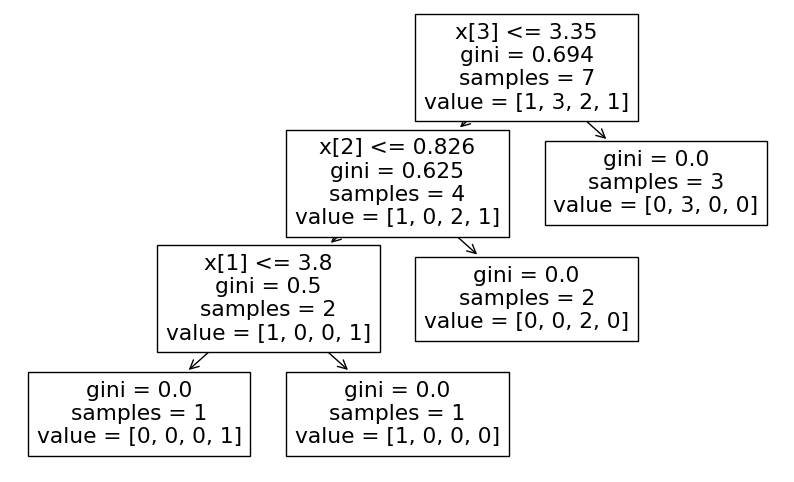

In [187]:
# Decision tree Classifier 

evaluate(dt_bag11,X,Y)

In [188]:
#accuracy_score(y_pred,y_test)

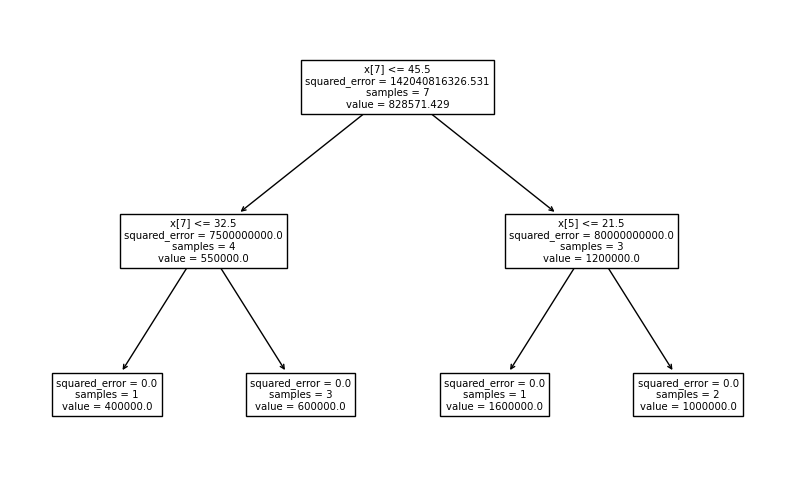

In [189]:
evaluate(dt_bag1,X,Y)

In [190]:
#@title Bagging with 3 Decision Trees 
df_bag = dff_train.sample(7,replace=True) 

X= df_bag.iloc[:,0:8]
Y= df_bag.iloc[:,-1]

df_bag

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
13,74,3.9,0.773,2.9,10,22,200000,30,400000
17,141,4.0,0.742,2.8,10,22,250000,52,1000000
18,213,4.0,0.742,2.8,10,22,250000,80,1500000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
7,257,3.8,0.833,3.0,10,22,250000,93,1800000
20,91,3.7,0.758,2.7,10,22,220000,35,550000
17,141,4.0,0.742,2.8,10,22,250000,52,1000000


In [191]:
X

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time
13,74,3.9,0.773,2.9,10,22,200000,30
17,141,4.0,0.742,2.8,10,22,250000,52
18,213,4.0,0.742,2.8,10,22,250000,80
1,202,3.7,0.701,2.5,10,21,260000,92
7,257,3.8,0.833,3.0,10,22,250000,93
20,91,3.7,0.758,2.7,10,22,220000,35
17,141,4.0,0.742,2.8,10,22,250000,52


In [192]:
#@title Bagging with 3 Decision Trees 2nd Bag
df_bag2 = dff_train.sample(7,replace=True) 

X= df_bag2.iloc[:,0:8]
Y= df_bag2.iloc[:,-1]

df_bag

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
13,74,3.9,0.773,2.9,10,22,200000,30,400000
17,141,4.0,0.742,2.8,10,22,250000,52,1000000
18,213,4.0,0.742,2.8,10,22,250000,80,1500000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
7,257,3.8,0.833,3.0,10,22,250000,93,1800000
20,91,3.7,0.758,2.7,10,22,220000,35,550000
17,141,4.0,0.742,2.8,10,22,250000,52,1000000


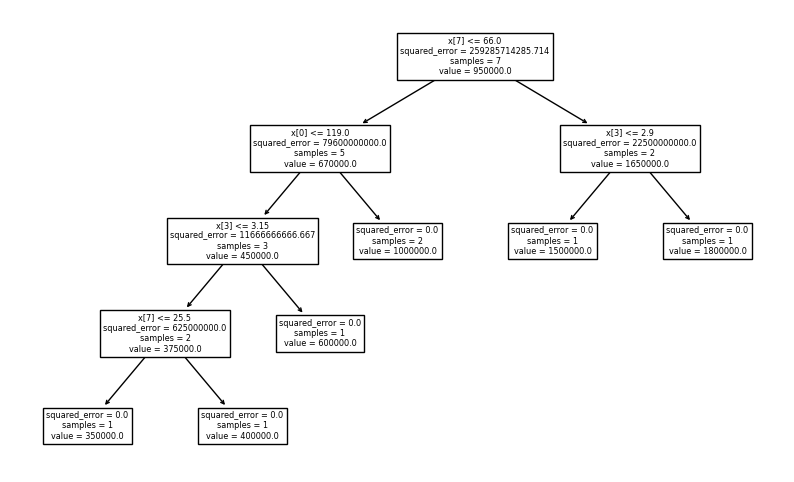

In [193]:
dt_bag2 = DecisionTreeRegressor()
evaluate(dt_bag2,X,Y)

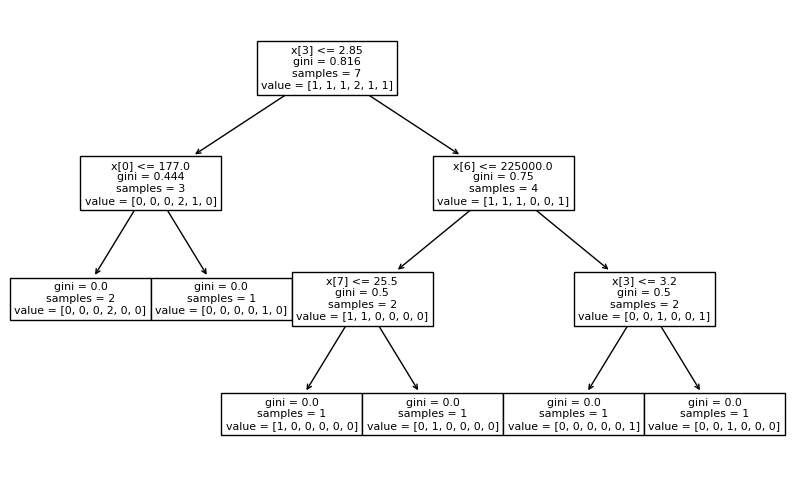

In [194]:
dt_bag22 = DecisionTreeClassifier()
evaluate(dt_bag22,X,Y)

In [195]:
#@title Bagging with 3 Decision Trees 3rd Bag
df_bag3 = dff_train.sample(7,replace=True) 

X= df_bag3.iloc[:,0:8]
Y= df_bag3.iloc[:,-1]

df_bag3

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
13,74,3.9,0.773,2.9,10,22,200000,30,400000
6,97,4.2,0.859,3.4,10,22,250000,35,600000
13,74,3.9,0.773,2.9,10,22,200000,30,400000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
16,113,4.0,0.742,2.8,10,22,250000,39,800000
17,141,4.0,0.742,2.8,10,22,250000,52,1000000


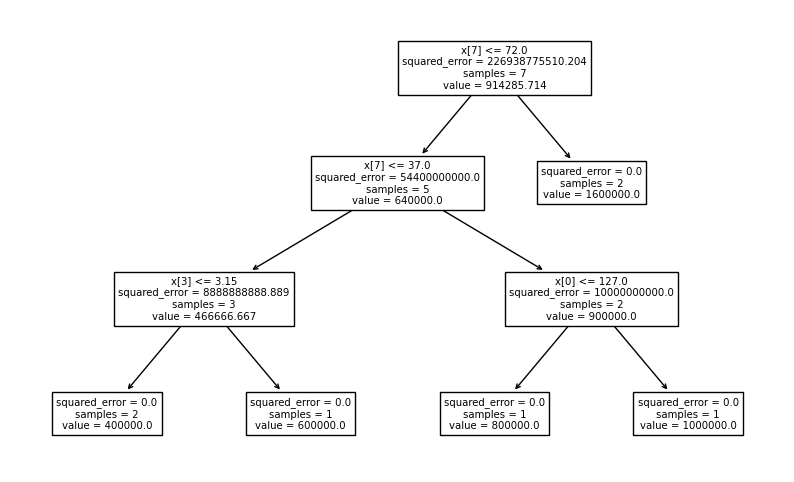

In [196]:
df_bag3 = DecisionTreeRegressor()
evaluate(df_bag3,X,Y)

In [197]:
from sklearn.ensemble import BaggingRegressor
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.25,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

Train / Test Sets sizes:  (16, 7) (5, 7) (16,) (3, 9)


In [198]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, df_bag3,df_bag2,df_bag],
          'n_estimators': [10,15,21],
          'max_samples': [0.25,0.5],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=2, n_jobs=-1, verbose=1)
import warnings
warnings.filterwarnings('ignore')
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))

print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 2 folds for each of 192 candidates, totalling 384 fits
Train R^2 Score : 0.891
Overall R^2 Score : 0.902
Best Parameters :  {'base_estimator': None, 'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 15}
CPU times: user 378 ms, sys: 42.7 ms, total: 421 ms
Wall time: 10.3 s


In [199]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([1266666.66666667, 1461666.66666667, 1180000.        ,
       2116666.66666667, 1310000.        , 2620000.        ,
        836666.66666667, 1721666.66666667,  595000.        ,
       1400000.        , 1016666.66666667,  608333.33333333,
        581666.66666667,  535000.        ,  501666.66666667,
       1816666.66666667,  806666.66666667, 1010000.        ,
       1450000.        ,  921666.66666667,  691666.66666667])

In [200]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)


In [201]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV  On Multiple Decision Trees

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
# MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.04021566627816627
MdMRE 0.044757575757575746
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 95.97843337218336


In [202]:
#@title Using Ensemble Technique 1st set of Algorithms

# 1
from sklearn.ensemble import BaggingRegressor



In [203]:
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.25,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

Train / Test Sets sizes:  (16, 7) (5, 7) (16,) (3, 9)


In [204]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [205]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [206]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [207]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.9345325652145052
R^2 score for DT 0.9192708333333334
R^2 score for KNN 0.708125


In [208]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [209]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.972
Test Coefficient of R^2 : 0.902


In [210]:
from sklearn.linear_model import Lasso

In [211]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,0.95],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=2, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 2 folds for each of 144 candidates, totalling 288 fits
Train R^2 Score : 0.933
Test R^2 Score : 0.972
Overall R^2 Score : 0.944
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.95, 'n_estimators': 21}
CPU times: user 273 ms, sys: 17.8 ms, total: 291 ms
Wall time: 6.88 s


In [212]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)


In [213]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([1070214.89851496, 1533100.84073905, 1157351.91313456,
       2150594.32364737,  952119.81614209, 2586111.4052966 ,
        715128.94156744, 1716873.49631141,  512040.48814573,
       1349793.26074625,  913571.5691904 ,  649965.5852243 ,
        578964.33037778,  447209.98321016,  355078.52062742,
       1951445.25736957,  844399.98012696, 1026259.33533244,
       1471427.42399424,  930068.80440221,  632778.16984533])

In [214]:
Y_train_pred_BAGGING

array([ 355078.52062742, 1471427.42399424,  715128.94156744,
        930068.80440221,  952119.81614209, 1157351.91313456,
       2586111.4052966 ,  844399.98012696, 1349793.26074625,
       1716873.49631141, 1026259.33533244, 2150594.32364737,
       1070214.89851496, 1951445.25736957,  578964.33037778])

In [215]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
# MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.013234474430747087
MdMRE 0.01331974438029174
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 98.6765525569253


In [216]:
#@title Third Approach Using Ensemble Learning - Bagging with use of Bootstrapping 

 


In [217]:
#@title Using Ensemble Technique Second set of Algorithms
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import KBinsDiscretizer

In [218]:
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.30,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

Train / Test Sets sizes:  (16, 7) (5, 7) (16,) (3, 9)


In [219]:
rkf = RandomForestRegressor()
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()

In [220]:
from logging import addLevelName
rkf.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
ada.fit(X_train,Y_train)

AdaBoostRegressor()

In [221]:
y_pred1 = rkf.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = ada.predict(X_test)

In [222]:
print("R^2 score for RF",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for ADA_B",r2_score(Y_test,y_pred3))

R^2 score for RF 0.8399941731770834
R^2 score for DT 0.5465494791666667
R^2 score for ADA_B 0.6976363570601852


In [223]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [224]:
Y_preds = bag_regressor.predict(X_test)

print('Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
# print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Coefficient of R^2 : 0.965


In [225]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,14,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.967
Test R^2 Score : 0.863
Overall R^2 Score : 0.962
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
CPU times: user 423 ms, sys: 20.5 ms, total: 443 ms
Wall time: 11.4 s


In [226]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [227]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([1153980.67232929, 1740103.3371204 , 1041140.07363083,
       2061138.38107296,  822155.85736814, 2884832.55071164,
        602702.38757511, 1698338.19864   ,  461332.28266295,
       1365117.94861827,  954684.7854971 ,  442809.50538614,
        366761.94769268,  255772.61585066,  146694.46369998,
       2062160.94967795,  896964.71554047, 1092549.33079748,
       1555492.25614419,  868718.49446388,  550031.76373337])

In [228]:
Y_train_pred_BAGGING

array([1555492.25614419,  602702.38757511,  868718.49446388,
        822155.85736814, 1041140.07363083, 2884832.55071164,
        896964.71554047, 1365117.94861827, 1698338.19864   ,
       1092549.33079748, 2061138.38107296, 1153980.67232929,
       2062160.94967795,  366761.94769268])

In [229]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
#MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.038535947209928714
MdMRE 0.03222599697856155
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 96.14640527900711


In [230]:
#@title Bonus Work

In [231]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.967
Test R^2 Score : 0.863
Overall R^2 Score : 0.962
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
CPU times: user 377 ms, sys: 33.7 ms, total: 410 ms
Wall time: 11.8 s


In [232]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.967
Test R^2 Score : 0.863
Test R^2 Score : 0.962
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
CPU times: user 389 ms, sys: 27.5 ms, total: 416 ms
Wall time: 11.7 s


In [233]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [234]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([1153980.67232929, 1740103.3371204 , 1041140.07363083,
       2061138.38107296,  822155.85736814, 2884832.55071164,
        602702.38757511, 1698338.19864   ,  461332.28266295,
       1365117.94861827,  954684.7854971 ,  442809.50538614,
        366761.94769268,  255772.61585066,  146694.46369998,
       2062160.94967795,  896964.71554047, 1092549.33079748,
       1555492.25614419,  868718.49446388,  550031.76373337])

In [235]:
Cat_2

0     1200000
1     1600000
2     1000000
3     2100000
4      750000
5     3200000
6      600000
7     1800000
8      500000
9     1200000
10     800000
11     650000
12     600000
13     400000
14     350000
15    2000000
16     800000
17    1000000
18    1500000
19     800000
20     550000
Name: Actual_Cost, dtype: int64

In [236]:
dff= result+Cat_2

In [237]:
dff

0     2.353981e+06
1     3.340103e+06
2     2.041140e+06
3     4.161138e+06
4     1.572156e+06
5     6.084833e+06
6     1.202702e+06
7     3.498338e+06
8     9.613323e+05
9     2.565118e+06
10    1.754685e+06
11    1.092810e+06
12    9.667619e+05
13    6.557726e+05
14    4.966945e+05
15    4.062161e+06
16    1.696965e+06
17    2.092549e+06
18    3.055492e+06
19    1.668718e+06
20    1.100032e+06
Name: Actual_Cost, dtype: float64

In [238]:
Y_train_pred_BAGGING

array([1555492.25614419,  602702.38757511,  868718.49446388,
        822155.85736814, 1041140.07363083, 2884832.55071164,
        896964.71554047, 1365117.94861827, 1698338.19864   ,
       1092549.33079748, 2061138.38107296, 1153980.67232929,
       2062160.94967795,  366761.94769268])

In [239]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=diff/Y_test
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)/diff.size
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
# MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.00471868741346066
MdMRE 0.02762228312448133
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 96.69691881057754


In [240]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None,RandomForestRegressor(), DecisionTreeRegressor(), AdaBoostRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,8],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Overall R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(Cat_1,Cat_2))
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Train R^2 Score : 0.998
Test R^2 Score : 0.840
Overall R^2 Score : 0.981
Best Parameters :  {'base_estimator': None, 'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 15}
CPU times: user 1.2 s, sys: 90.2 ms, total: 1.29 s
Wall time: 2min 28s


In [241]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [242]:
result=bagging_regressor_grid.predict(Cat_1) 
result

array([1200000.        , 1386666.66666667, 1000000.        ,
       2100000.        ,  750000.        , 3200000.        ,
        600000.        , 1800000.        ,  613333.33333333,
       1200000.        ,  846666.66666667,  733333.33333333,
        600000.        ,  600000.        ,  600000.        ,
       1910000.        ,  870000.        , 1043333.33333333,
       1476666.66666667,  800000.        ,  626666.66666667])

In [243]:
Y_train_pred_BAGGING

array([1476666.66666667,  600000.        ,  800000.        ,
        750000.        , 1000000.        , 3200000.        ,
        870000.        , 1200000.        , 1800000.        ,
       1043333.33333333, 2100000.        , 1200000.        ,
       1910000.        ,  600000.        ])

In [244]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)/MRE.size
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)
Accuracy=(1-MRE)*100
Accuracy=(Accuracy.mean())
# MRE=(diff/y_test)/MRE.size
P2=MRE[MRE<MMRE]
print("PRED MMRE",Pred2)
print("Model Accuracy",Accuracy)

MMRE 0.005539994505009083
MdMRE 0.019913419913419904
PRED 25% 100.0
PRED MMRE 60.0
Model Accuracy 96.12200384649364
